<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/Module_2_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
from sklearn import preprocessing, metrics, ensemble, model_selection
import numpy as np
from matplotlib import pyplot as plt

# Data preprocessing

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
target = data.pop("y")
test_data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")

In [ ]:
for name, column in data.iteritems():
  if column.dtype == 'object':
    le = preprocessing.LabelEncoder()
    le.fit(column)
    print(name, le.classes_)
    data[name] = le.transform(column)
    test_data[name] = le.transform(test_data[name])

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ['divorced' 'married' 'single' 'unknown']
education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ['no' 'unknown' 'yes']
housing ['no' 'unknown' 'yes']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ['failure' 'nonexistent' 'success']


In [ ]:
data = data[['job', 'marital']]

In [ ]:
data.head()

,job,marital
0,housemaid,married
1,services,married
2,services,married
3,admin.,married
4,services,married


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(target)
target = pd.DataFrame(le.transform(target), columns=['y'])

In [ ]:
print(data.head())
print(test_data.head())
print(target.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1    999         0         1           1.1   
1            1         1    999         0         1           1.1   
2            1         1    999         0         1           1.1   
3            1         1    999         0         1           1.1   
4            1         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0  
1          93.99

## Data visualization

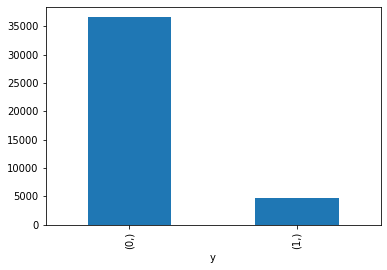

In [ ]:
target.value_counts().plot.bar()

This is your baseline accuracy that you should do better than

In [ ]:
metrics.accuracy_score(target, np.zeros_like(target))

0.8873458288821987

In the confusion matrix, we care most about the bottom right hand corner (out of all the yes's how many did we predict yes?

In [ ]:
metrics.confusion_matrix(target, np.zeros_like(target))

array([[36548,     0],
       [ 4640,     0]])

## Naive Model

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target)

In [ ]:
clf = ensemble.RandomForestClassifier()
clf.fit(X_train, y_train.y)

RandomForestClassifier()

In [ ]:
print(metrics.accuracy_score(y_train, clf.predict(X_train)), metrics.accuracy_score(y_test, clf.predict(X_test)))

0.994917613544398 0.9011362532776537


We can see a generalization error problem - it is overfitting

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


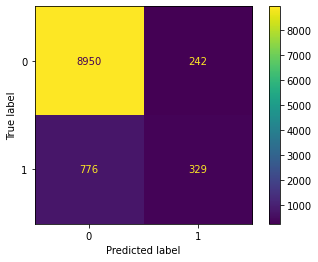

In [ ]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

We also see a class imbalance problem, most are predicted as no

In [ ]:
out_csv = pd.DataFrame(clf.predict(test_data), columns=['predictions'])
out_csv.to_csv('team4-module2-predictions.csv', index=False)

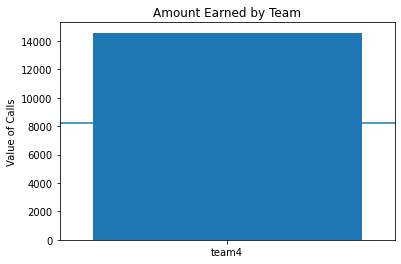

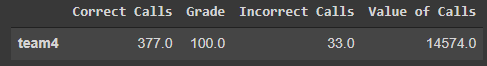

Hahaha I thought that would fail. Oh well!

## How to improve?

### Let's balance our dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
X_new, y_new = ro.fit_resample(X_train, y_train)

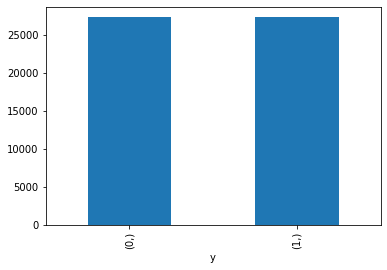

In [ ]:
y_new.value_counts().plot.bar()

In [ ]:
clf = ensemble.RandomForestClassifier()
clf.fit(X_new, y_new.y)

RandomForestClassifier()

In [ ]:
print(metrics.accuracy_score(y_train, clf.predict(X_train)), metrics.accuracy_score(y_test, clf.predict(X_test)))

0.9940759444498397 0.8903564144896572


Generalization error looks just as bad

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


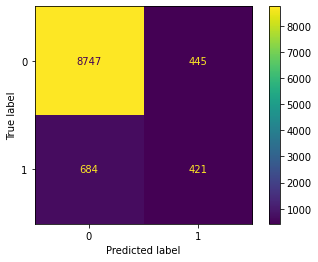

In [ ]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

This looks better - out of all the yes's we now have more predicted yes's.

In [ ]:
out_csv = pd.DataFrame(clf.predict(test_data), columns=['predictions'])
out_csv.to_csv('team4-module2-predictions.csv', index=False)

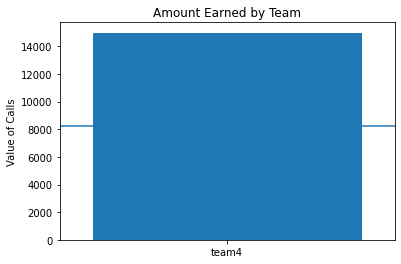

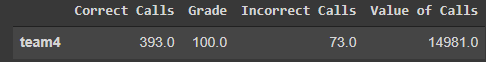

We made more correct calls (16)! But also more incorrect calls (40), so we ended up around the same (about $400 more).

### Now, lets look at overfitting

I'm going to limit how powerful my random forest can be

0.9937522255673173 0.8868602505584151


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


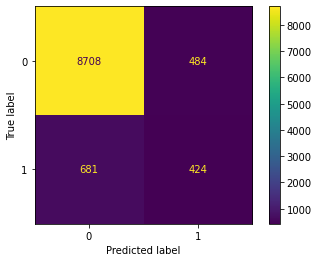

In [ ]:
# You can play with changing the number of estimators, for me it didn't make much of a difference
# (again, what I care about is bottom right and generalization gap)
clf = ensemble.RandomForestClassifier(n_estimators=25)
clf.fit(X_new, y_new.y)
print(metrics.accuracy_score(y_train, clf.predict(X_train)), metrics.accuracy_score(y_test, clf.predict(X_test)))
metrics.plot_confusion_matrix(clf, X_test, y_test)

0.8634230034637921 0.8570457414781004


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


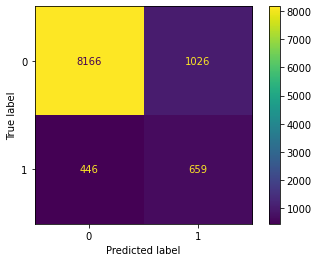

In [ ]:
# You can play with changing the max depth of the tree
clf = ensemble.RandomForestClassifier(max_depth=10)
clf.fit(X_new, y_new.y)
print(metrics.accuracy_score(y_train, clf.predict(X_train)), metrics.accuracy_score(y_test, clf.predict(X_test)))
metrics.plot_confusion_matrix(clf, X_test, y_test)

This one helped tremendously! Even though our train accuracy dropped, the generalizaiton gap is much smaller. And we called ~200 more customers who would have subscribed.

You basically want to bring down the power of your model until it stops overfitting on training data

0.8356802952316209 0.8367485675439449


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


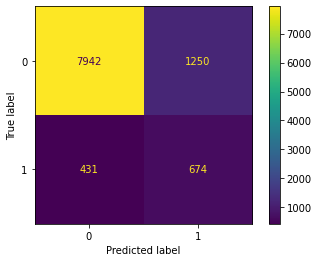

In [ ]:
# You can play with changing the max leaf nodes used
clf = ensemble.RandomForestClassifier(max_leaf_nodes=10)
clf.fit(X_new, y_new.y)
print(metrics.accuracy_score(y_train, clf.predict(X_train)), metrics.accuracy_score(y_test, clf.predict(X_test)))
metrics.plot_confusion_matrix(clf, X_test, y_test)

Again, this helps

0.9940759444498397 0.8902592988249004


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


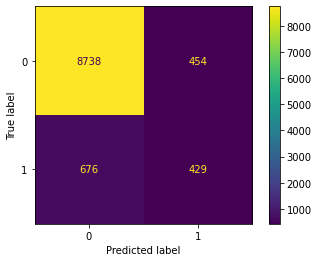

In [ ]:
# You can play with the class weight (making 1 more important)
clf = ensemble.RandomForestClassifier(class_weight={0:1, 1:20})
clf.fit(X_new, y_new.y)
print(metrics.accuracy_score(y_train, clf.predict(X_train)), metrics.accuracy_score(y_test, clf.predict(X_test)))
metrics.plot_confusion_matrix(clf, X_test, y_test)

I'll be honest, this didn't work as well as I would have thought haha

#### Final model to check

0.8496002071800848 0.8517043799164805


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


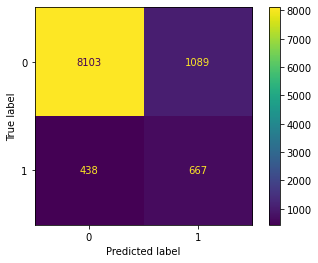

In [ ]:
# You can play with changing the max depth of the tree
clf = ensemble.RandomForestClassifier(max_depth=15, max_leaf_nodes=20)
clf.fit(X_new, y_new.y)
print(metrics.accuracy_score(y_train, clf.predict(X_train)), metrics.accuracy_score(y_test, clf.predict(X_test)))
metrics.plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
out_csv = pd.DataFrame(clf.predict(test_data), columns=['predictions'])
out_csv.to_csv('team4-module2-predictions.csv', index=False)

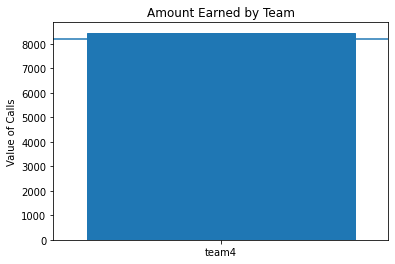

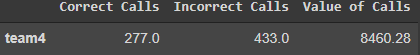

Okay, I'll be honest that hurt way more than it helped. Oops

## Other things you can consider

### Only using the most important features

<BarContainer object of 19 artists>

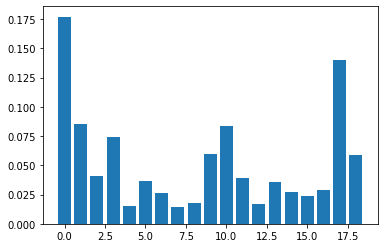

In [ ]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

You can use the importance features above, or insights from your own data analysis (occupation/economy and other important features).

### undersampling instead of oversampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()